In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

path_dir = "./area"
program_list = os.listdir(path_dir)

level_line = [[20,20,20,20], [20,20,20,20], [20,20,18,19], [20,20,20,19], [20,20,20,19]]

mean_data = []
final_level = []

for i in range(len(program_list)):
    program_name = program_list[i]
    data = pd.read_csv(path_dir + "/" + program_name)
    num = int(level_line[i][0]) + int(level_line[i][1])
    sum = 0
    data_list = []
    dif = []
    mean_data = []
    final_level = []
    
    for k in range(len(data)):
        data_list.append(float(data["data"].iloc[k])) 
    for j in range(num):
        sum += data_list[j]
    
    mean = sum / num
    mean_data.append(mean)

    for n in range(num):
        dif.append(abs(data_list[n]-mean))
    
    dif_sort = sorted(dif)
    level1 = dif_sort[int(num*0.25)-1]
    level2 = dif_sort[int(num*0.5)-1]
    level3 = dif_sort[int(num*0.75)-1]
    level4 = dif_sort[int(num*1-1)]
    
    final_level.append(level1)
    final_level.append(level2)
    final_level.append(level3)
    final_level.append(level4)
    
    
    level_data = []     
    
    for l in range(len(data_list)):
        if mean-level1 <= data_list[l] <= mean+level1:
            level_data.append("level5") 
        elif (mean-level2 <= data_list[l] <= mean-level1) or (mean+level1 <= data_list[l] <= mean+level2):
            level_data.append("level4")
        elif (mean-level3 <= data_list[l] <= mean-level2) or (mean+level2 <= data_list[l] <= mean+level3):
            level_data.append("level3")
        elif (mean-level4 <= data_list[l] <= mean-level3) or (mean+level3 <= data_list[l] <= mean+level4):
            level_data.append("level2")
        else:
            level_data.append("level1")
    
    end = 0
    
    for m in range(4):
        start = end
        end = start + level_line[i][m]
        
        print(program_name.replace('.csv', '') + "   Phase"+ str(m+1))
        result = Counter(level_data[start:end])
        print("level1 : " + str(result["level1"]) + "  level2 : " + str(result["level2"]) + "  level3 : " + str(result["level3"]) + "  level4 : " + str(result["level4"]) + "  level5 : " +  str(result["level5"]) )
#        print("\n")
    
#    df1 = pd.DataFrame(mean_data, columns = ["means"])    
##    if not os.path.exists('./analyze/mean.csv'):
#        df1.to_csv("./analyze/mean.csv", index=False, mode='w')
#    else:
#        df1.to_csv("./analyze/mean.csv", index=False, mode='a', header=False)
        
    
#    df2 = pd.DataFrame(final_level, columns = ["level_data"])
#    if not os.path.exists('./analyze/' + program_name.replace(".csv", "") + '_level.csv'):
##        df2.to_csv('./analyze/' + program_name.replace(".csv", "") + '_level.csv', index=False, mode='w')
 #   else:
 #       df2.to_csv('./analyze/' + program_name.replace(".csv", "") + '_level.csv', index=False, mode='a', header=False)
    
    print("\n")
    data['level'] = level_data
    data.to_csv("./area/" + program_name, index = False)
    

    


programid_1   Phase1
level1 : 0  level2 : 10  level3 : 1  level4 : 4  level5 : 5
programid_1   Phase2
level1 : 0  level2 : 0  level3 : 9  level4 : 6  level5 : 5
programid_1   Phase3
level1 : 18  level2 : 2  level3 : 0  level4 : 0  level5 : 0
programid_1   Phase4
level1 : 20  level2 : 0  level3 : 0  level4 : 0  level5 : 0


programid_2   Phase1
level1 : 0  level2 : 6  level3 : 5  level4 : 0  level5 : 9
programid_2   Phase2
level1 : 0  level2 : 4  level3 : 5  level4 : 10  level5 : 1
programid_2   Phase3
level1 : 3  level2 : 17  level3 : 0  level4 : 0  level5 : 0
programid_2   Phase4
level1 : 5  level2 : 15  level3 : 0  level4 : 0  level5 : 0


programid_3   Phase1
level1 : 0  level2 : 2  level3 : 6  level4 : 3  level5 : 9
programid_3   Phase2
level1 : 0  level2 : 8  level3 : 4  level4 : 7  level5 : 1
programid_3   Phase3
level1 : 1  level2 : 15  level3 : 0  level4 : 2  level5 : 0
programid_3   Phase4
level1 : 4  level2 : 13  level3 : 0  level4 : 2  level5 : 0


programid_4   Phase1
level

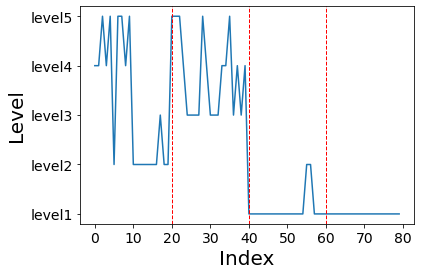

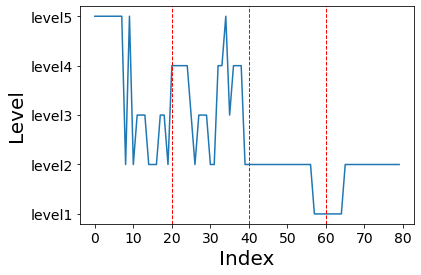

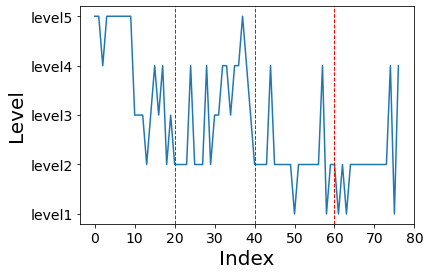

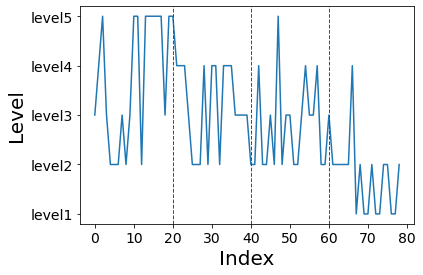

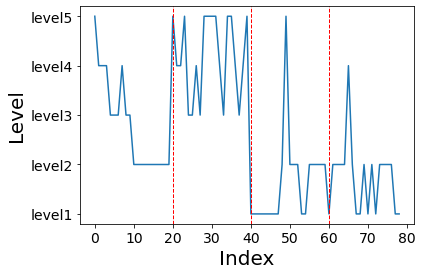

In [19]:
import numpy as np

for i in range(len(program_list)):
    program_name = program_list[i]
    data = pd.read_csv(path_dir + "/" + program_name)
    level_plot =data['level']
    level_final = []
    level_str = []
    for j in range(len(level_plot)):
#        level_str.append(level_plot.iloc[j])
        level_final.append(level_plot.iloc[j])
        level_final[j] = int(level_final[j].replace('level', ''))
    
    plt.rc('font', size=14)
    plt.rc('legend', fontsize=24)
    plt.rc('axes', labelsize=20)
    plt.plot(level_final)
    plt.xticks(np.arange(0,81, 10))
    plt.xlabel('Index')
    plt.ylabel('Level')
    plt.axvline(x=20, color='r', linestyle='--', linewidth=1)
    plt.axvline(x=40, color='r', linestyle='--', linewidth=1)
    plt.axvline(x=60, color='r', linestyle='--', linewidth=1)
    plt.yticks(np.arange(1,6,1), labels = ['level1', 'level2', 'level3', 'level4', 'level5'])
#plt.gca().invert_yaxis()
#    plt.xticks["level1","level2", "level3","level4" ]
#plt.title(program_name.replace('.csv', '')+"_level")
    plt.show()